In [ ]:
pip install pandas

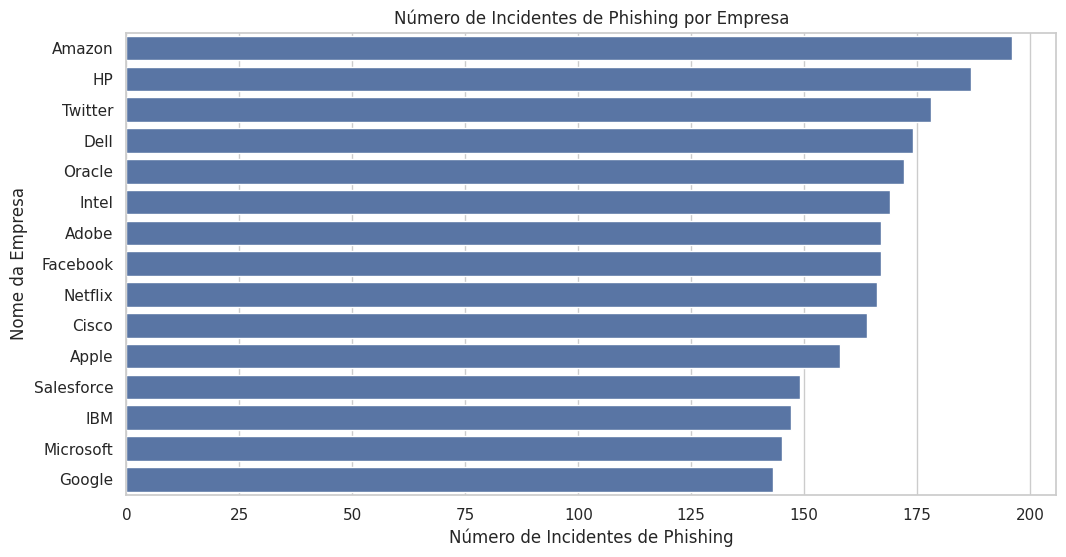

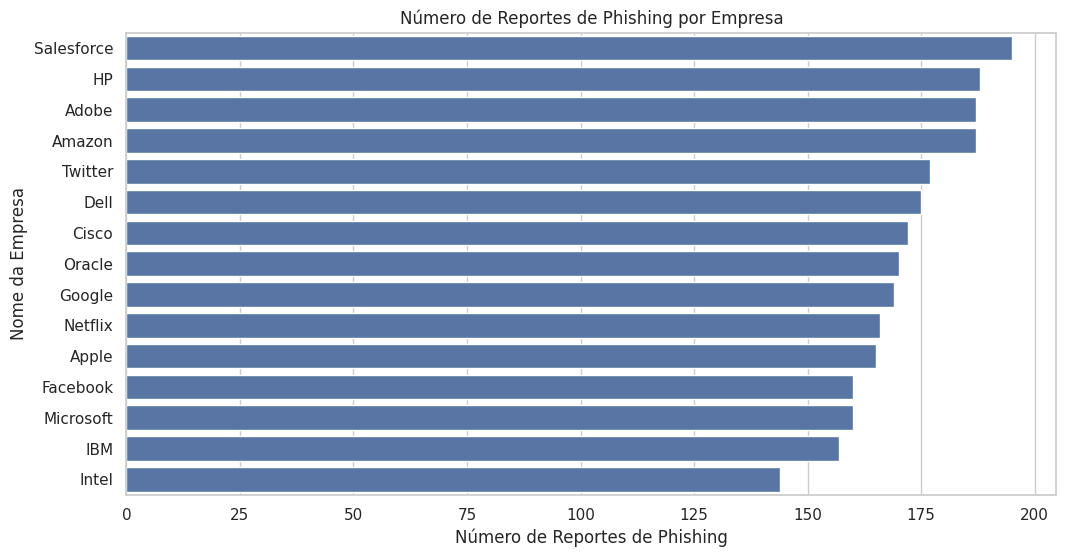

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar a base de dados
data = pd.read_csv("large_phishing_data_with_email.csv")

# Preprocessamento: Convertendo 'Caiu no Phishing' e 'Reportou' para valores binários
data['Caiu no Phishing'] = data['Caiu no Phishing'].apply(lambda x: 1 if x == 'Sim' else 0)
data['Reportou'] = data['Reportou'].apply(lambda x: 1 if x == 'Sim' else 0)

# Agrupando dados para contar incidentes de phishing e reportes por empresa
phishing_counts = data.groupby('Nome da Empresa')['Caiu no Phishing'].sum().reset_index()
report_counts = data.groupby('Nome da Empresa')['Reportou'].sum().reset_index()

# Configuração do estilo dos gráficos
sns.set(style="whitegrid")

# Gráfico de Incidentes de Phishing por Empresa
plt.figure(figsize=(12, 6))
sns.barplot(x="Caiu no Phishing", y="Nome da Empresa", data=phishing_counts.sort_values(by="Caiu no Phishing", ascending=False))
plt.title("Número de Incidentes de Phishing por Empresa")
plt.xlabel("Número de Incidentes de Phishing")
plt.ylabel("Nome da Empresa")
plt.show()

# Gráfico de Reportes de Phishing por Empresa
plt.figure(figsize=(12, 6))
sns.barplot(x="Reportou", y="Nome da Empresa", data=report_counts.sort_values(by="Reportou", ascending=False))
plt.title("Número de Reportes de Phishing por Empresa")
plt.xlabel("Número de Reportes de Phishing")
plt.ylabel("Nome da Empresa")
plt.show()


In [ ]:
pip install prophet

DEBUG:cmdstanpy:input tempfile: /tmp/tmpabv75bse/_mkfb916.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpabv75bse/3ij8vcsw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51186', 'data', 'file=/tmp/tmpabv75bse/_mkfb916.json', 'init=/tmp/tmpabv75bse/3ij8vcsw.json', 'output', 'file=/tmp/tmpabv75bse/prophet_model44wxvcw4/prophet_model-20241109200005.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:00:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:00:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

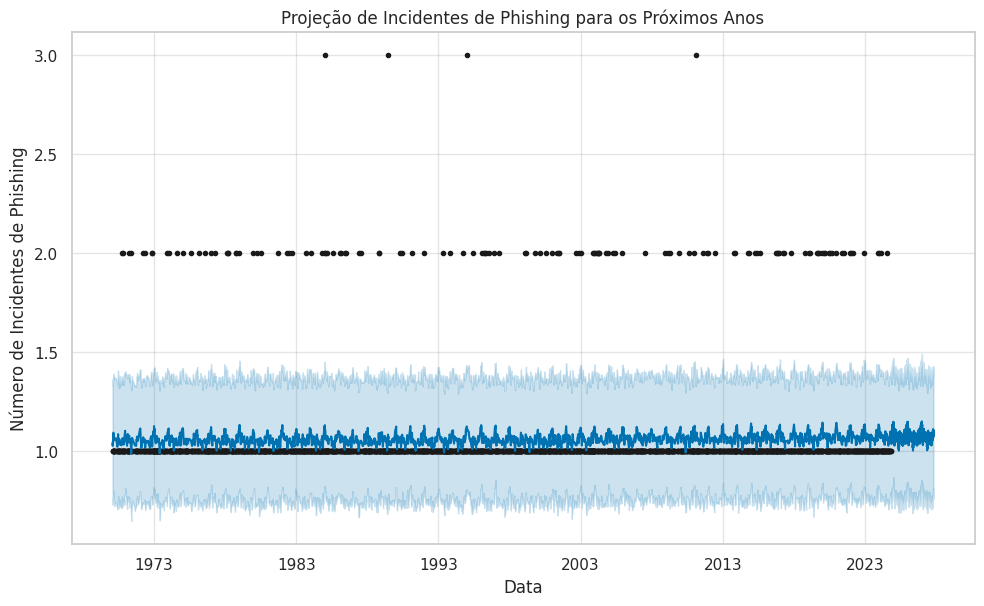

<Figure size 1000x600 with 0 Axes>

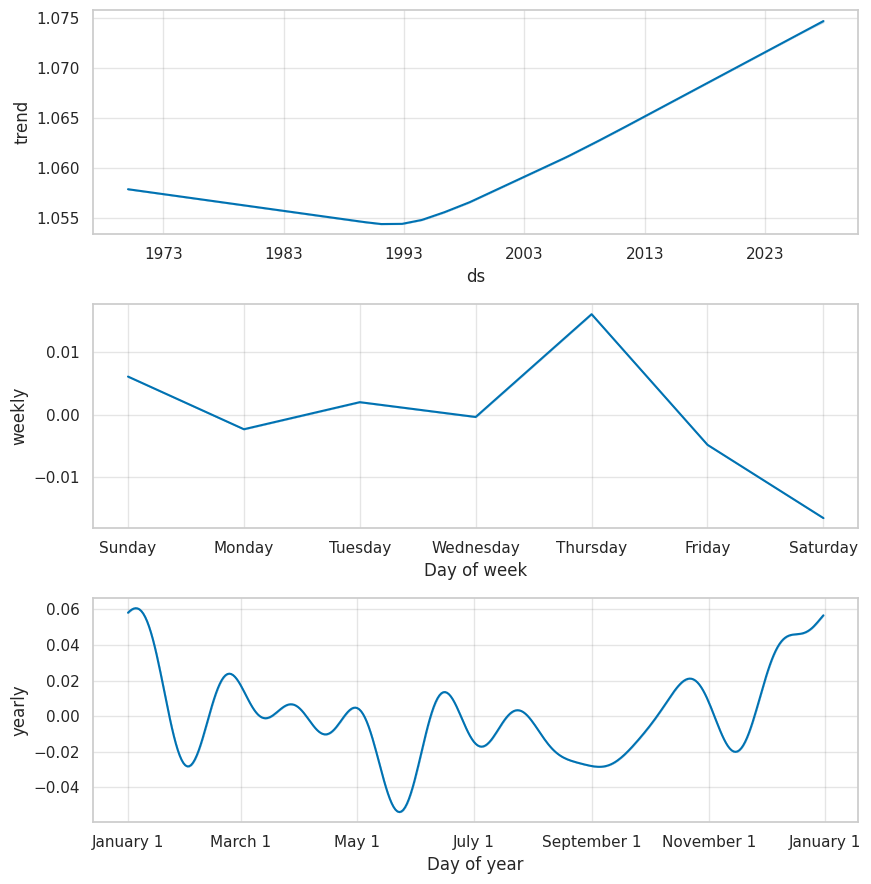

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Carregar a base de dados
data = pd.read_csv("large_phishing_data_with_email.csv")

# Pré-processamento: Filtrando apenas os incidentes de phishing
data['Data'] = pd.to_datetime(data['Data'])  # Garantindo que a coluna "Data" seja datetime
phishing_data = data[data['Caiu no Phishing'] == "Sim"]

# Contagem de incidentes de phishing por data
daily_phishing = phishing_data.groupby('Data').size().reset_index(name='Incidentes')

# Renomeando as colunas para o Prophet
daily_phishing = daily_phishing.rename(columns={'Data': 'ds', 'Incidentes': 'y'})

# Instanciando e treinando o modelo Prophet
model = Prophet(yearly_seasonality=True, daily_seasonality=False)
model.fit(daily_phishing)

# Projeção para os próximos anos (ex.: 3 anos)
future = model.make_future_dataframe(periods=3 * 365)  # 3 anos em dias
forecast = model.predict(future)

# Visualização das previsões
plt.figure(figsize=(10, 6))
model.plot(forecast)
plt.title("Projeção de Incidentes de Phishing para os Próximos Anos")
plt.xlabel("Data")
plt.ylabel("Número de Incidentes de Phishing")
plt.show()

# Visualização de componentes da previsão (tendência e sazonalidade)
plt.figure(figsize=(10, 6))
model.plot_components(forecast)
plt.show()


# Criar campanha de phishing

INSTALAÇÕES

In [1]:
pip install pandas

IMPORTAÇÕES

In [2]:
import pandas as pd
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

Função para enviar o e-mail

In [3]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
import pandas as pd

# Função para enviar e-mail
def enviar_email(destinatario, assunto, mensagem):
    # Configurações do servidor SMTP
    smtp_server = 'smtp.gmail.com'
    smtp_port = 587
    usuario = 'sensorenchenteads1@gmail.com'
    senha = 'hdrq eiye gffj kcjd'

    # Criação da mensagem
    msg = MIMEMultipart()  # Usando MIMEMultipart para suportar múltiplas partes
    msg['From'] = usuario
    msg['To'] = destinatario
    msg['Subject'] = assunto

    # Anexando o corpo da mensagem em HTML
    msg.attach(MIMEText(mensagem, 'html'))

    # Enviando o e-mail
    with smtplib.SMTP(smtp_server, smtp_port) as server:
        server.starttls()
        server.login(usuario, senha)
        server.send_message(msg)

# Lendo a lista de e-mails de um arquivo .txt
emails_df = pd.read_csv('lista_emails.txt', delimiter=',')

# Removendo espaços em branco dos nomes das colunas
emails_df.columns = emails_df.columns.str.strip()


In [4]:
# Verificando as colunas do DataFrame
print(emails_df.columns)

Index(['Nome', 'email'], dtype='object')


Mensagem do e-mail

In [9]:
# Modelo de mensagem com hiperlink
modelo_mensagem = f"""\
    <p>Prezados alunas, prezados alunos do 4º semestre do curso de Análise e Desenvolvimento de Sistemas.</p>
    <p>É com satisfação que informamos que as notas do PEDEP já estão disponíveis no portal do aluno. Para acessá-las, por favor, sigam as instruções abaixo:</p>
    <p>1. Acesse o link: <a href="http://localhost:5000/clone">Portal do Aluno</a></p>
    <p>2. Faça login utilizando seu RA e senha.</p>
    <p>Caso tenham dúvidas ou dificuldades, não hesitem em entrar em contato com a coordenação do curso.</p>
    <p>Atenciosamente,<br>Davi de Oliveira Lemes<br>Coordenação do Curso de Análise e Desenvolvimento de Sistemas<br>Fecap</p>
    """

In [10]:
# Enviando e-mails personalizados
for index, row in emails_df.iterrows():
    nome = row['Nome']
    email = row['email']

    mensagem_personalizada = modelo_mensagem.format(nome=nome)

    try:
        enviar_email(email, '4 ADS - Notas do PEDEP', mensagem_personalizada)
        print(f'E-mail enviado para {email}')
    except Exception as e:
        print(f'Erro ao enviar e-mail para {email}: {e}')

E-mail enviado para matheus_sd20@hotmail.com
E-mail enviado para matheussampaio31@gmail.com
E-mail enviado para guilhermedeamorimmedeiros@yahoo.com.br
E-mail enviado para lorenapbernardo08@gmail.com
E-mail enviado para sensorenchenteads1@gmail.com
